In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.constants as c
import astropy.units as u
import sys
sys.path.insert(0,'../Athena-TIGRESS/python/')
import pyathena as pa

def read(dir, prob, i):
    """ read vtk and return x, y, z, density, velocity """
    da = pa.AthenaDataSet(dir+"/id0/"+prob+".{:04g}".format(i)+".vtk")
    xmin=da.domain['left_edge']
    xmax=da.domain['right_edge']
    dx=da.domain['dx']
    x=np.arange(xmin[0],xmax[0],dx[0])+0.5*dx[0]
    y=np.arange(xmin[1],xmax[1],dx[1])+0.5*dx[1]
    den = da.read_all_data('density')
    vel = da.read_all_data('velocity')
    dic = {"x":x, "y":y, "den":den.mean(axis=0), "vel":vel.mean(axis=0)}
    return dic

def vc_MH(R,R_b,rho_b):
    xi = R/R_b
    fourpiG = 0.05404692
    return np.sqrt(fourpiG*rho_b*R_b**2*(np.log(xi+np.sqrt(1+xi**2))/xi - 1./np.sqrt(1+xi**2)))

def vc_KE17(R):
    return 215 + 95*np.tanh((R-70)/60) - 50*np.log10(R) + 1.5*(np.log10(R))**3

def vcirc(x,y,omg=0.04,pot="MH"):
    R = np.sqrt(x[None,:]*x[None,:]+y[:,None]*y[:,None])
    if (pot=="MH"):
        R_b = 120
        rho_b = 265
        v = vc_MH(R,R_b,rho_b)
        v -= R*omg
        return v
    elif (pot=="KE"):
        v = vc_KE17(R)
        v -= R*omg
        return v

# Angular Momentum

## Kim & Elmegreen rotation curve model

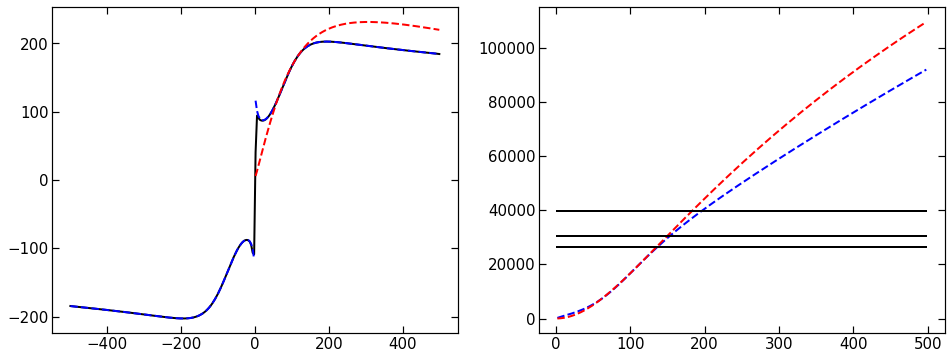

In [4]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
dir="/home/smoon/data/gc/C10V220M1/"
prob="GC"
t0 = 10
ds = read(dir,prob,t0)
ax[0].plot(ds['x'], ds['vel'][128,:,1])
ax[0].plot(ds['x'][128:], vcirc(ds['x'],ds['y'],omg=0.04,pot="KE")[128,128:],'b--')
ax[0].plot(ds['x'][:128], -vcirc(ds['x'],ds['y'],omg=0.04,pot="KE")[128,:128],'b--')
ax[0].plot(ds['x'][128:], vcirc(ds['x'],ds['y'],omg=0.04,pot="MH")[128,128:],'r--')
ax[1].plot(ds['x'][128:], ds['x'][128:]*vcirc(ds['x'],ds['y'],omg=0.04,pot="KE")[128,128:], 'b--')
ax[1].plot(ds['x'][128:], ds['x'][128:]*vcirc(ds['x'],ds['y'],omg=0.04,pot="MH")[128,128:], 'r--')
ax[1].plot(ds['x'][128:], 120*220*np.ones(128), 'k-')
ax[1].plot(ds['x'][128:], 1.5*120*220*np.ones(128), 'k-')
ax[1].plot(ds['x'][128:], 1.5*120*170*np.ones(128), 'k-')


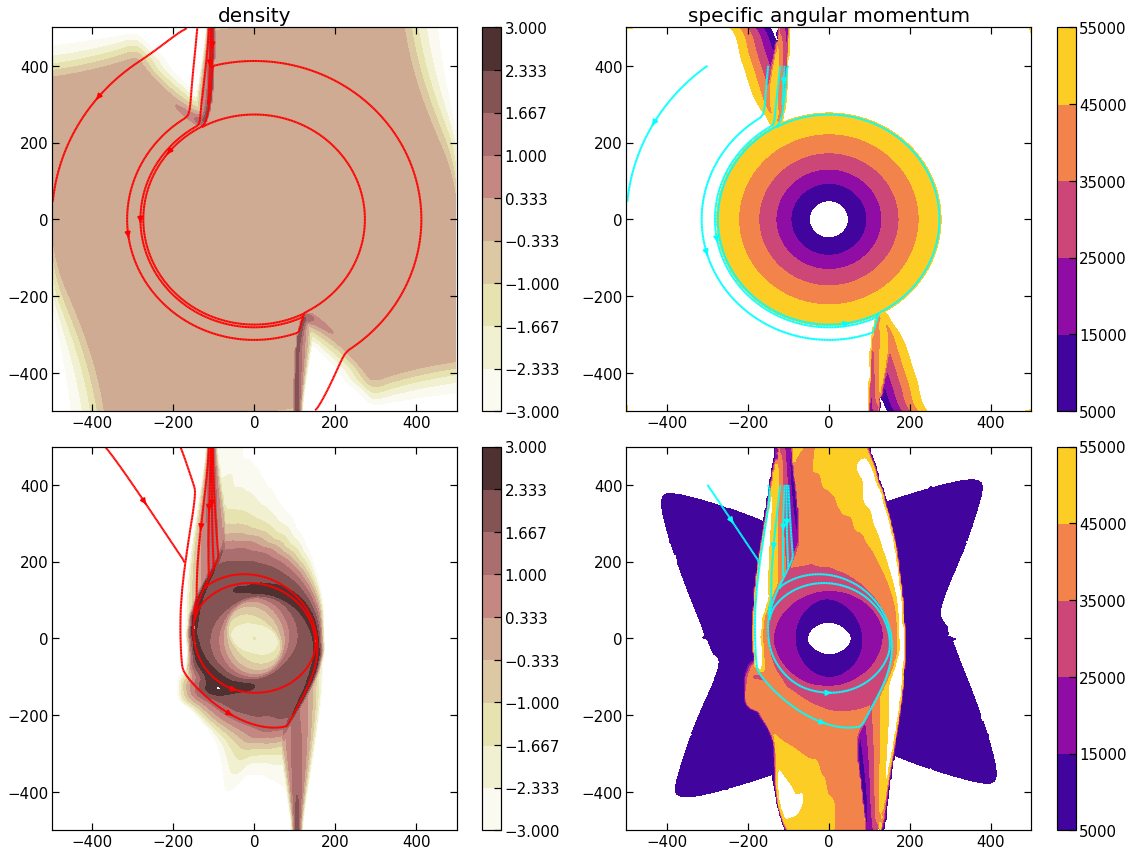

In [5]:
fig, ax = plt.subplots(2,2,figsize=(16,12))
nl=10
levels_den=np.linspace(-3,3,nl)
levels_Lz = [5000,15000,25000,35000,45000,55000]
dir="/home/smoon/data/gc/C10V220M1/"
prob="GC"
t0 = 10
t1 = 1500
N = 256 # resolution
cm="plasma"
cm_d="pink_r"
sp = [(-100,400),(-105,400),(-110,400),(-120,400),(-150,400),(-300,400)]

# t = t0
ds = read(dir,prob,t0)
ds['Lz'] = ds['x'][None,:]*ds['vel'][:,:,1] - ds['y'][:,None]*ds['vel'][:,:,0]

#density contour
ct=ax[0,0].contourf(ds['x'],ds['y'],np.log10(ds['den']),levels=levels_den,cmap=cm_d)
ax[0,0].streamplot(ds['x'],ds['y'],ds['vel'][:,:,0],ds['vel'][:,:,1],color='r',start_points=sp,density=N/30.)
fig.colorbar(ct,ax=ax[0,0])
#angular momentum contour
ct=ax[0,1].contourf(ds['x'],ds['y'],ds['Lz'],levels=levels_Lz,cmap=cm)
ax[0,1].streamplot(ds['x'],ds['y'],ds['vel'][:,:,0],ds['vel'][:,:,1],color='cyan',start_points=sp,density=N/30.,
                   integration_direction='forward')
fig.colorbar(ct,ax=ax[0,1])

# t = t1
ds = read(dir,prob,t1)
ds['Lz'] = ds['x'][None,:]*ds['vel'][:,:,1] - ds['y'][:,None]*ds['vel'][:,:,0]
#density contour
ct=ax[1,0].contourf(ds['x'],ds['y'],np.log10(ds['den']),levels=levels_den,cmap=cm_d)
ax[1,0].streamplot(ds['x'],ds['y'],ds['vel'][:,:,0],ds['vel'][:,:,1],color='r',start_points=sp,density=N/30.)
fig.colorbar(ct,ax=ax[1,0])
#angular momentum contour
ct=ax[1,1].contourf(ds['x'],ds['y'],ds['Lz'],levels=levels_Lz,cmap=cm)
ax[1,1].streamplot(ds['x'],ds['y'],ds['vel'][:,:,0],ds['vel'][:,:,1],color='cyan',start_points=sp,density=N/30.,
                   integration_direction='forward')
fig.colorbar(ct,ax=ax[1,1])

ax[0,0].set_xlim(-500,500); ax[0,0].set_title("density")
ax[0,0].set_ylim(-500,500)
ax[0,1].set_xlim(-500,500); ax[0,1].set_title("specific angular momentum")
ax[0,1].set_ylim(-500,500)
ax[1,0].set_xlim(-500,500)
ax[1,0].set_ylim(-500,500)
ax[1,1].set_xlim(-500,500)
ax[1,1].set_ylim(-500,500)
fig.tight_layout()

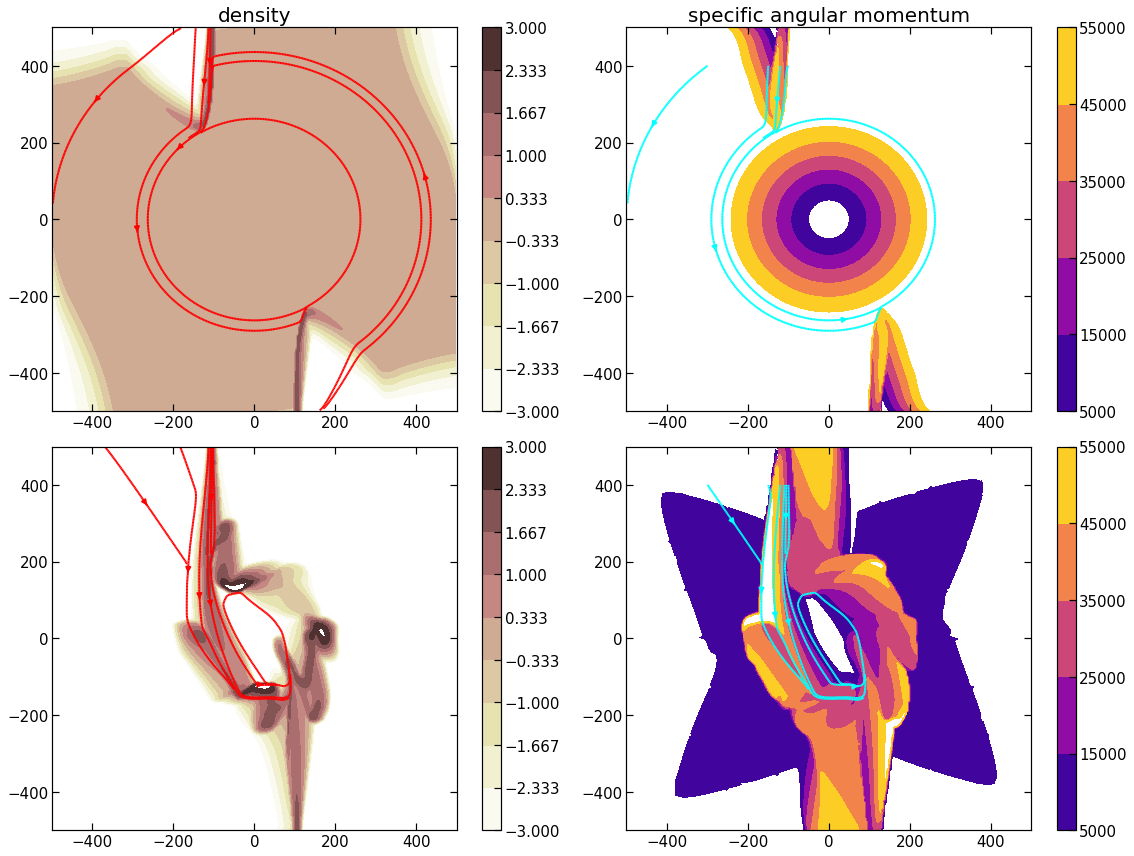

In [8]:
fig, ax = plt.subplots(2,2,figsize=(16,12))
nl=10
levels_den=np.linspace(-3,3,nl)
levels_Lz = [5000,15000,25000,35000,45000,55000]
dir="/home/smoon/data/gc/20190326_rho100_Mdot0.5/"
prob="GC_test"
t0 = 10
t1 = 1942
N = 256 # resolution
cm="plasma"
cm_d = "pink_r"
sp = [(-100,400),(-105,400),(-110,400),(-120,400),(-150,400),(-300,400)]

# t = t0
ds = read(dir,prob,t0)
ds['Lz'] = ds['x'][None,:]*ds['vel'][:,:,1] - ds['y'][:,None]*ds['vel'][:,:,0]

#density contour
ct=ax[0,0].contourf(ds['x'],ds['y'],np.log10(ds['den']),levels=levels_den,cmap=cm_d)
ax[0,0].streamplot(ds['x'],ds['y'],ds['vel'][:,:,0],ds['vel'][:,:,1],color='r',start_points=sp,density=N/30.)
fig.colorbar(ct,ax=ax[0,0])
#angular momentum contour
ct=ax[0,1].contourf(ds['x'],ds['y'],ds['Lz'],levels=levels_Lz,cmap=cm)
ax[0,1].streamplot(ds['x'],ds['y'],ds['vel'][:,:,0],ds['vel'][:,:,1],color='cyan',start_points=sp,density=N/30.,
                   integration_direction='forward')
fig.colorbar(ct,ax=ax[0,1])

# t = t1
ds = read(dir,prob,t1)
ds['Lz'] = ds['x'][None,:]*ds['vel'][:,:,1] - ds['y'][:,None]*ds['vel'][:,:,0]
#density contour
ct=ax[1,0].contourf(ds['x'],ds['y'],np.log10(ds['den']),levels=levels_den,cmap=cm_d)
ax[1,0].streamplot(ds['x'],ds['y'],ds['vel'][:,:,0],ds['vel'][:,:,1],color='r',start_points=sp,density=N/30.)
fig.colorbar(ct,ax=ax[1,0])
#angular momentum contour
ct=ax[1,1].contourf(ds['x'],ds['y'],ds['Lz'],levels=levels_Lz,cmap=cm)
ax[1,1].streamplot(ds['x'],ds['y'],ds['vel'][:,:,0],ds['vel'][:,:,1],color='cyan',start_points=sp,density=N/30.,
                   integration_direction='forward')
fig.colorbar(ct,ax=ax[1,1])

ax[0,0].set_xlim(-500,500); ax[0,0].set_title("density")
ax[0,0].set_ylim(-500,500)
ax[0,1].set_xlim(-500,500); ax[0,1].set_title("specific angular momentum")
ax[0,1].set_ylim(-500,500)
ax[1,0].set_xlim(-500,500)
ax[1,0].set_ylim(-500,500)
ax[1,1].set_xlim(-500,500)
ax[1,1].set_ylim(-500,500)
fig.tight_layout()

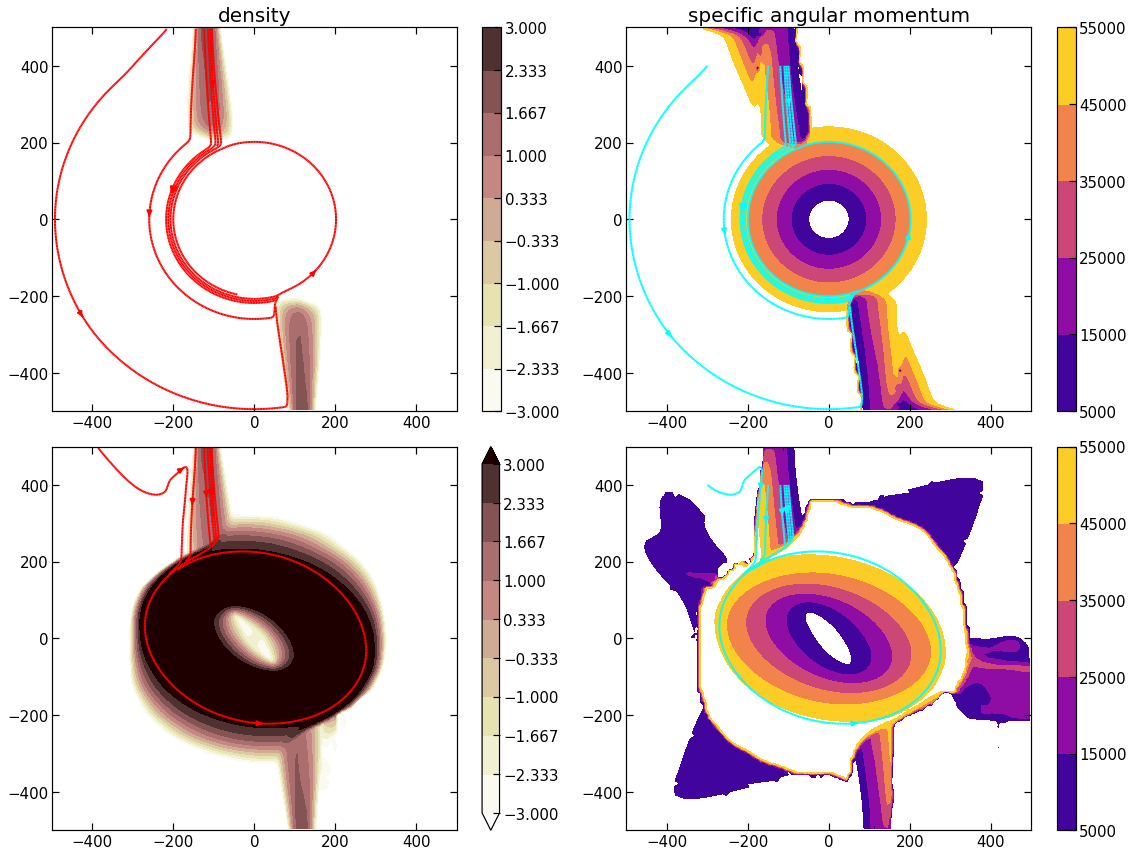

In [9]:
fig, ax = plt.subplots(2,2,figsize=(16,12))
nl=10
levels_den=np.linspace(-3,3,nl)
levels_Lz = [5000,15000,25000,35000,45000,55000]
dir="/home/smoon/data/gc/20190328_Mdot0.5/"
prob="GC_test"
t0 = 10
t1 = 500
N = 256 # resolution
cm="plasma"
cm_d = "pink_r"
sp = [(-100,400),(-105,400),(-110,400),(-120,400),(-150,400),(-300,400)]

# t = t0
ds = read(dir,prob,t0)
ds['Lz'] = ds['x'][None,:]*ds['vel'][:,:,1] - ds['y'][:,None]*ds['vel'][:,:,0]

#density contour
ct=ax[0,0].contourf(ds['x'],ds['y'],np.log10(ds['den']),levels=levels_den,cmap=cm_d)
ax[0,0].streamplot(ds['x'],ds['y'],ds['vel'][:,:,0],ds['vel'][:,:,1],color='r',start_points=sp,density=N/30.)
fig.colorbar(ct,ax=ax[0,0])
#angular momentum contour
ct=ax[0,1].contourf(ds['x'],ds['y'],ds['Lz'],levels=levels_Lz,cmap=cm)
ax[0,1].streamplot(ds['x'],ds['y'],ds['vel'][:,:,0],ds['vel'][:,:,1],color='cyan',start_points=sp,density=N/30.,
                   integration_direction='forward')
fig.colorbar(ct,ax=ax[0,1])

# t = t1
ds = read(dir,prob,t1)
ds['Lz'] = ds['x'][None,:]*ds['vel'][:,:,1] - ds['y'][:,None]*ds['vel'][:,:,0]
#density contour
ct=ax[1,0].contourf(ds['x'],ds['y'],np.log10(ds['den']),levels=levels_den,cmap=cm_d,extend='both')
ax[1,0].streamplot(ds['x'],ds['y'],ds['vel'][:,:,0],ds['vel'][:,:,1],color='r',start_points=sp,density=N/30.)
fig.colorbar(ct,ax=ax[1,0])
#angular momentum contour
ct=ax[1,1].contourf(ds['x'],ds['y'],ds['Lz'],levels=levels_Lz,cmap=cm)
ax[1,1].streamplot(ds['x'],ds['y'],ds['vel'][:,:,0],ds['vel'][:,:,1],color='cyan',start_points=sp,density=N/30.,
                   integration_direction='forward')
fig.colorbar(ct,ax=ax[1,1])

ax[0,0].set_xlim(-500,500); ax[0,0].set_title("density")
ax[0,0].set_ylim(-500,500)
ax[0,1].set_xlim(-500,500); ax[0,1].set_title("specific angular momentum")
ax[0,1].set_ylim(-500,500)
ax[1,0].set_xlim(-500,500)
ax[1,0].set_ylim(-500,500)
ax[1,1].set_xlim(-500,500)
ax[1,1].set_ylim(-500,500)
fig.tight_layout()

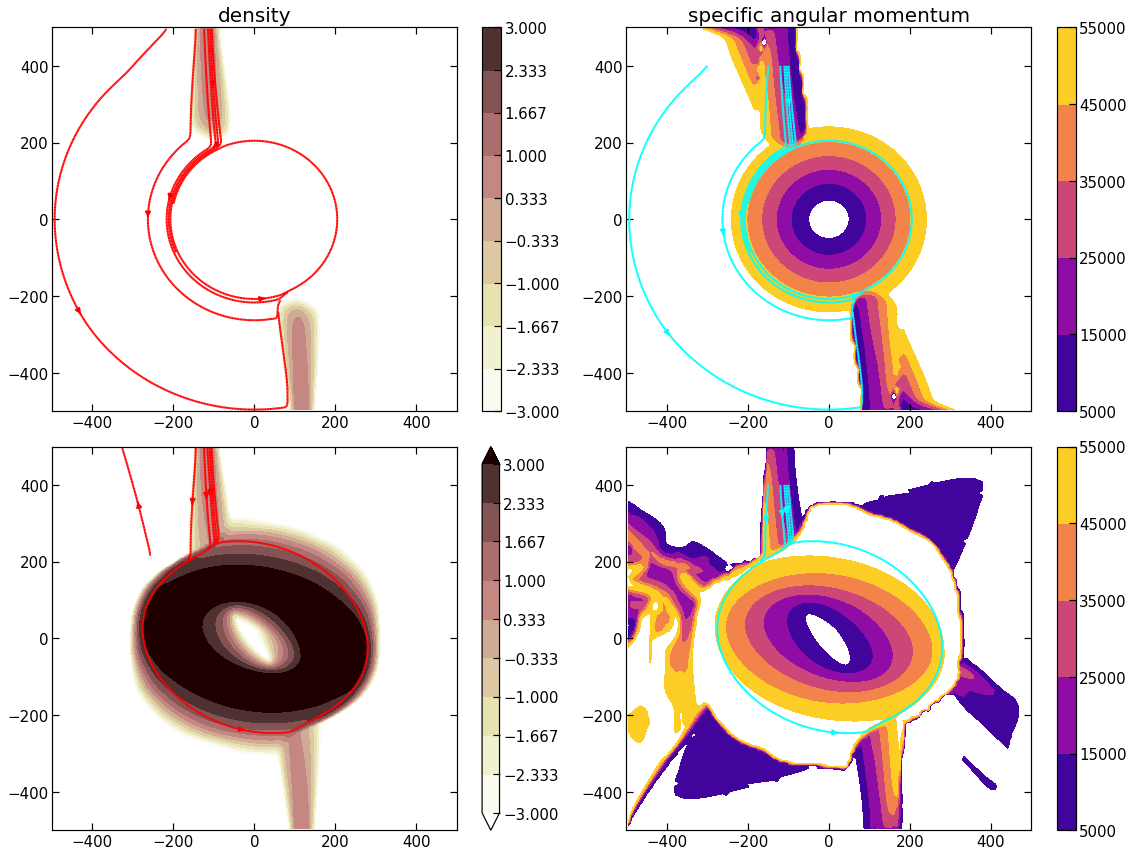

In [11]:
fig, ax = plt.subplots(2,2,figsize=(16,12))
nl=10
levels_den=np.linspace(-3,3,nl)
levels_Lz = [5000,15000,25000,35000,45000,55000]
dir="/home/smoon/data/gc/20190328_Mdot0.05/"
prob="GC_test"
t0 = 10
t1 = 500
N = 256 # resolution
cm="plasma"
cm_d = "pink_r"
sp = [(-100,400),(-105,400),(-110,400),(-120,400),(-150,400),(-300,400)]

# t = t0
ds = read(dir,prob,t0)
ds['Lz'] = ds['x'][None,:]*ds['vel'][:,:,1] - ds['y'][:,None]*ds['vel'][:,:,0]

#density contour
ct=ax[0,0].contourf(ds['x'],ds['y'],np.log10(ds['den']),levels=levels_den,cmap=cm_d)
ax[0,0].streamplot(ds['x'],ds['y'],ds['vel'][:,:,0],ds['vel'][:,:,1],color='r',start_points=sp,density=N/30.)
fig.colorbar(ct,ax=ax[0,0])
#angular momentum contour
ct=ax[0,1].contourf(ds['x'],ds['y'],ds['Lz'],levels=levels_Lz,cmap=cm)
ax[0,1].streamplot(ds['x'],ds['y'],ds['vel'][:,:,0],ds['vel'][:,:,1],color='cyan',start_points=sp,density=N/30.,
                   integration_direction='forward')
fig.colorbar(ct,ax=ax[0,1])

# t = t1
ds = read(dir,prob,t1)
ds['Lz'] = ds['x'][None,:]*ds['vel'][:,:,1] - ds['y'][:,None]*ds['vel'][:,:,0]
#density contour
ct=ax[1,0].contourf(ds['x'],ds['y'],np.log10(ds['den']),levels=levels_den,cmap=cm_d,extend='both')
ax[1,0].streamplot(ds['x'],ds['y'],ds['vel'][:,:,0],ds['vel'][:,:,1],color='r',start_points=sp,density=N/30.)
fig.colorbar(ct,ax=ax[1,0])
#angular momentum contour
ct=ax[1,1].contourf(ds['x'],ds['y'],ds['Lz'],levels=levels_Lz,cmap=cm)
ax[1,1].streamplot(ds['x'],ds['y'],ds['vel'][:,:,0],ds['vel'][:,:,1],color='cyan',start_points=sp,density=N/30.,
                   integration_direction='forward')
fig.colorbar(ct,ax=ax[1,1])

ax[0,0].set_xlim(-500,500); ax[0,0].set_title("density")
ax[0,0].set_ylim(-500,500)
ax[0,1].set_xlim(-500,500); ax[0,1].set_title("specific angular momentum")
ax[0,1].set_ylim(-500,500)
ax[1,0].set_xlim(-500,500)
ax[1,0].set_ylim(-500,500)
ax[1,1].set_xlim(-500,500)
ax[1,1].set_ylim(-500,500)
fig.tight_layout()

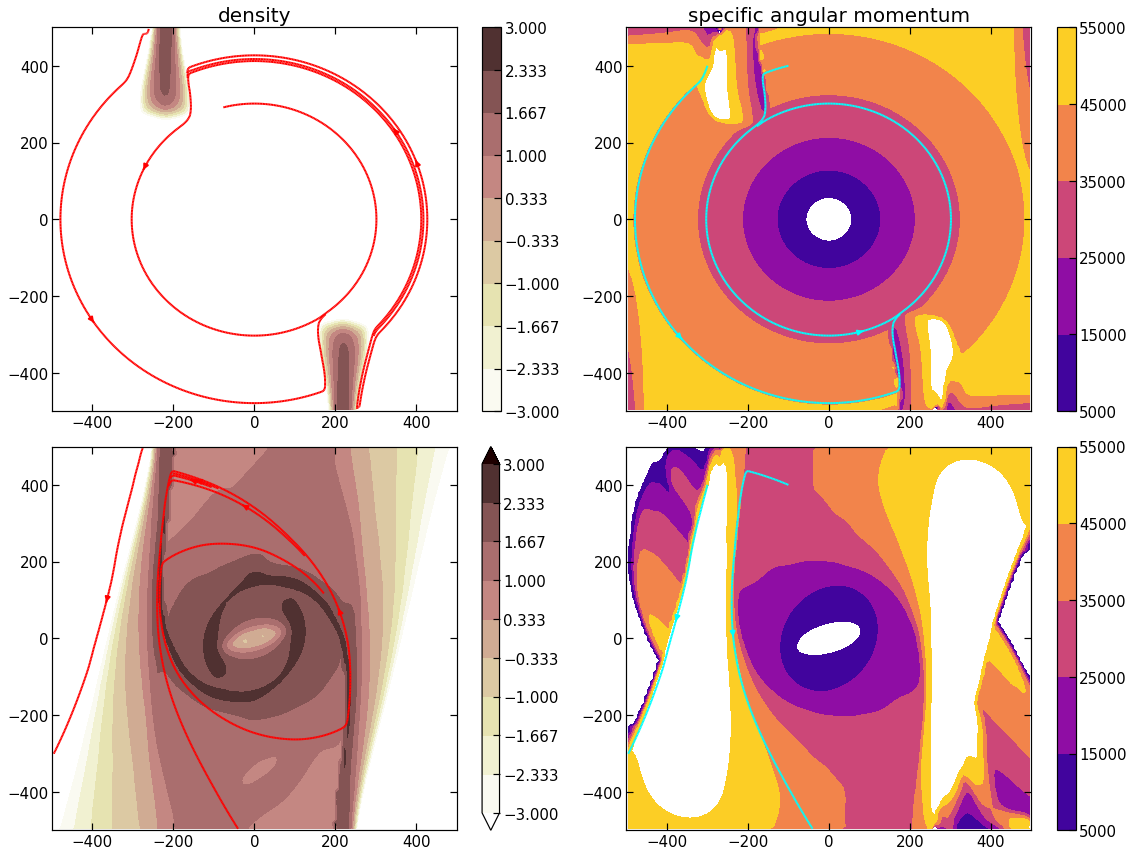

In [12]:
fig, ax = plt.subplots(2,2,figsize=(16,12))
nl=10
levels_den=np.linspace(-3,3,nl)
levels_Lz = [5000,15000,25000,35000,45000,55000]
dir="/home/smoon/data/gc/D200/"
prob="GC_test"
t0 = 10
t1 = 500
N = 256 # resolution
cm="plasma"
cm_d = "pink_r"
sp = [(-100,400),(-105,400),(-110,400),(-120,400),(-150,400),(-300,400)]

# t = t0
ds = read(dir,prob,t0)
ds['Lz'] = ds['x'][None,:]*ds['vel'][:,:,1] - ds['y'][:,None]*ds['vel'][:,:,0]

#density contour
ct=ax[0,0].contourf(ds['x'],ds['y'],np.log10(ds['den']),levels=levels_den,cmap=cm_d)
ax[0,0].streamplot(ds['x'],ds['y'],ds['vel'][:,:,0],ds['vel'][:,:,1],color='r',start_points=sp,density=N/30.)
fig.colorbar(ct,ax=ax[0,0])
#angular momentum contour
ct=ax[0,1].contourf(ds['x'],ds['y'],ds['Lz'],levels=levels_Lz,cmap=cm)
ax[0,1].streamplot(ds['x'],ds['y'],ds['vel'][:,:,0],ds['vel'][:,:,1],color='cyan',start_points=sp,density=N/30.,
                   integration_direction='forward')
fig.colorbar(ct,ax=ax[0,1])

# t = t1
ds = read(dir,prob,t1)
ds['Lz'] = ds['x'][None,:]*ds['vel'][:,:,1] - ds['y'][:,None]*ds['vel'][:,:,0]
#density contour
ct=ax[1,0].contourf(ds['x'],ds['y'],np.log10(ds['den']),levels=levels_den,cmap=cm_d,extend='both')
ax[1,0].streamplot(ds['x'],ds['y'],ds['vel'][:,:,0],ds['vel'][:,:,1],color='r',start_points=sp,density=N/30.)
fig.colorbar(ct,ax=ax[1,0])
#angular momentum contour
ct=ax[1,1].contourf(ds['x'],ds['y'],ds['Lz'],levels=levels_Lz,cmap=cm)
ax[1,1].streamplot(ds['x'],ds['y'],ds['vel'][:,:,0],ds['vel'][:,:,1],color='cyan',start_points=sp,density=N/30.,
                   integration_direction='forward')
fig.colorbar(ct,ax=ax[1,1])

ax[0,0].set_xlim(-500,500); ax[0,0].set_title("density")
ax[0,0].set_ylim(-500,500)
ax[0,1].set_xlim(-500,500); ax[0,1].set_title("specific angular momentum")
ax[0,1].set_ylim(-500,500)
ax[1,0].set_xlim(-500,500)
ax[1,0].set_ylim(-500,500)
ax[1,1].set_xlim(-500,500)
ax[1,1].set_ylim(-500,500)
fig.tight_layout()

In [ ]:
dir="/home/smoon/data/gc/R2W2"
prob="GC_test"
t0 = 147
N = 256 # resolution
cm="plasma"
cm_d = "pink_r"

# t = t0
ds = read(dir,prob,t0)
ds['Lz'] = ds['x'][None,:]*ds['vel'][:,:,1] - ds['y'][:,None]*ds['vel'][:,:,0]